# Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import acquire
import tyler_explore

In [2]:
df = acquire.get_survey_data('survey.csv')

In [3]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2014-08-27 11:29:31 to 2016-02-01 23:04:31
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non

In [5]:
#creating function for Linh's prepare file
def encoding_columns(df):
    #create a column list for for loop below:
    col_list= ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']
    for col in col_list:
        df[col] = df[col].map({'No': 0, 'Yes': 1})
    return df


In [6]:
encoding_columns(df)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,0,1,Often,6-25,0,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0,NaN
2014-08-27 11:29:37,44,M,United States,IN,NaN,0,0,Rarely,More than 1000,0,...,Don't know,Maybe,No,No,No,No,No,Don't know,0,NaN
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,0,0,Rarely,6-25,0,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0,NaN
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,1,1,Often,26-100,0,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1,NaN
2014-08-27 11:30:22,31,Male,United States,TX,NaN,0,0,Never,100-500,1,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-12 11:17:21,26,male,United Kingdom,NaN,0.0,0,1,NaN,26-100,0,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,0,NaN
2015-09-26 01:07:35,32,Male,United States,IL,0.0,1,1,Often,26-100,1,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,0,NaN
2015-11-07 12:36:58,34,male,United States,CA,0.0,1,1,Sometimes,More than 1000,0,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,0,NaN


# Testing Tyler's Univariate Function

In [7]:
cat_vars= ['family_history', 'treatment']

In [8]:
quant_vars =['Age']

(None,
 count    1.259000e+03
 mean     7.942815e+07
 std      2.818299e+09
 min     -1.726000e+03
 25%      2.700000e+01
 50%      3.100000e+01
 75%      3.600000e+01
 max      1.000000e+11
 Name: Age, dtype: float64)

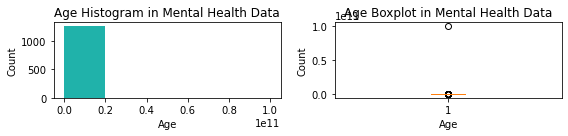

In [9]:
tyler_explore.explore_univariate_quant(df, 'Age')

**Note: Quantative variables Need X and Y labels**

In [10]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

In [11]:
df.Age.value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          